<a href="https://colab.research.google.com/github/Jesica-Conserva/Jesica_Conserva_ProjectoDSIII_Coderhouse/blob/main/Datasets_Conserva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Proyecto final Data Science III**

## **Presentación**

El presente trabajo consiste en realizar un análisis de sentimiento  sobre las reseñas de los consumidores de instrumentos musicales en Amazon (fuente: Kaggle)

### **Importo las librerías necesarias para el trabajo**

In [2]:
import pandas as pd
import zipfile
import numpy as np

In [3]:
# Importo la base de datos
!git clone https://github.com/Jesica-Conserva/Jesica_Conserva_ProjectoDSIII_Coderhouse.git

Cloning into 'Jesica_Conserva_ProjectoDSIII_Coderhouse'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 2.72 MiB | 12.32 MiB/s, done.


In [4]:
#Importo repositorios para dar formato de tabla a la información del CSV
from google.colab import data_table
from vega_datasets import data
data_table.enable_dataframe_formatter()

In [5]:
# Defino la ruta de acceso al zip
zip_file_path = '/content/Jesica_Conserva_ProjectoDSIII_Coderhouse/Musical_Instruments_5.json.zip'


In [6]:
# Abro el zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Obtengo una lista de las carpetas en el zip
    files_in_zip = zip_ref.namelist()
    # Asumiendo que hay solo un archivo JSON
    json_file_name = files_in_zip[0]
    # Extraigo el archivo JSON a una carpeta temporal
    with zip_ref.open(json_file_name) as json_file:
        # Leo el JSON y lo inserto en un dataframe
        df = pd.read_json(json_file, lines=True)




In [80]:
df.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                              Jake  [13, 14]   
2                     Rick Bennette "Rick Bennette"    [1, 1]   
3                         RustyBill "Sunday Rocker"    [0, 0]   
4                                     SEAN MASLANKA    [0, 0]   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...        5   
1  The product does exactly as it should and is q...        5   
2  The primary job of this device is to block the...        5   
3  Nice windscreen protects my MXL mic and preven...        5   
4  This pop filter is great. It looks and perform...        5   

                                 summary  unixReviewTime   reviewTime  \
0                                   good      1393545600  02 28, 2014   
1                                   Jake      1363392000  03 16, 2013   
2                   It Does The Job Well      1377648000  08 28, 2013   
3          GOOD WINDSCREEN FOR THE MONEY      1392336000  02 14, 2014   
4  No more pops when I record my vocals.      1392940800  02 21, 2014   

  Sentiment  Positivo  
0  positivo         1  
1  positivo         1  
2  positivo         1  
3  positivo         1  
4  positivo         1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      10261 non-null  object
 1   asin            10261 non-null  object
 2   reviewerName    10234 non-null  object
 3   helpful         10261 non-null  object
 4   reviewText      10261 non-null  object
 5   overall         10261 non-null  int64 
 6   summary         10261 non-null  object
 7   unixReviewTime  10261 non-null  int64 
 8   reviewTime      10261 non-null  object
dtypes: int64(2), object(7)
memory usage: 721.6+ KB


In [9]:
df['Sentiment'] = df['overall'].apply(lambda x: 'positivo' if x >= 4 else 'negativo')

In [81]:
df.head()

reviewerID        asin  \
0  A2IBPI20UZIR0U  1384719342   
1  A14VAT5EAX3D9S  1384719342   
2  A195EZSQDW3E21  1384719342   
3  A2C00NNG1ZQQG2  1384719342   
4   A94QU4C90B1AX  1384719342   

                                       reviewerName   helpful  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                              Jake  [13, 14]   
2                     Rick Bennette "Rick Bennette"    [1, 1]   
3                         RustyBill "Sunday Rocker"    [0, 0]   
4                                     SEAN MASLANKA    [0, 0]   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...        5   
1  The product does exactly as it should and is q...        5   
2  The primary job of this device is to block the...        5   
3  Nice windscreen protects my MXL mic and preven...        5   
4  This pop filter is great. It looks and perform...        5   

                                 summary  unixReviewTime   reviewTime  \
0                                   good      1393545600  02 28, 2014   
1                                   Jake      1363392000  03 16, 2013   
2                   It Does The Job Well      1377648000  08 28, 2013   
3          GOOD WINDSCREEN FOR THE MONEY      1392336000  02 14, 2014   
4  No more pops when I record my vocals.      1392940800  02 21, 2014   

  Sentiment  Positivo  
0  positivo         1  
1  positivo         1  
2  positivo         1  
3  positivo         1  
4  positivo         1

In [82]:
df_sentiment=df.drop(columns=['reviewerID', 'asin'])

In [84]:
df_sentiment.head()

reviewerName   helpful  \
0  cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                              Jake  [13, 14]   
2                     Rick Bennette "Rick Bennette"    [1, 1]   
3                         RustyBill "Sunday Rocker"    [0, 0]   
4                                     SEAN MASLANKA    [0, 0]   

                                          reviewText  overall  \
0  Not much to write about here, but it does exac...        5   
1  The product does exactly as it should and is q...        5   
2  The primary job of this device is to block the...        5   
3  Nice windscreen protects my MXL mic and preven...        5   
4  This pop filter is great. It looks and perform...        5   

                                 summary  unixReviewTime   reviewTime  \
0                                   good      1393545600  02 28, 2014   
1                                   Jake      1363392000  03 16, 2013   
2                   It Does The Job Well      1377648000  08 28, 2013   
3          GOOD WINDSCREEN FOR THE MONEY      1392336000  02 14, 2014   
4  No more pops when I record my vocals.      1392940800  02 21, 2014   

  Sentiment  Positivo  
0  positivo         1  
1  positivo         1  
2  positivo         1  
3  positivo         1  
4  positivo         1

In [85]:
df_sentiment.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerName    10234 non-null  object
 1   helpful         10261 non-null  object
 2   reviewText      10261 non-null  object
 3   overall         10261 non-null  int64 
 4   summary         10261 non-null  object
 5   unixReviewTime  10261 non-null  int64 
 6   reviewTime      10261 non-null  object
 7   Sentiment       10261 non-null  object
 8   Positivo        10261 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 721.6+ KB


In [86]:
df['Positivo'] = np.where(df['Sentiment'] == 'negativo', 0, 1)


In [88]:
df_sentiment

reviewerName   helpful  \
0      cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                                  Jake  [13, 14]   
2                         Rick Bennette "Rick Bennette"    [1, 1]   
3                             RustyBill "Sunday Rocker"    [0, 0]   
4                                         SEAN MASLANKA    [0, 0]   
...                                                 ...       ...   
10256                                   Lonnie M. Adams    [0, 0]   
10257                                Michael J. Edelman    [0, 0]   
10258                                  Michael L. Knapp    [0, 0]   
10259                           Rick Langdon "Scriptor"    [0, 0]   
10260                                   TheTerrorBeyond    [0, 0]   

                                              reviewText  overall  \
0      Not much to write about here, but it does exac...        5   
1      The product does exactly as it should and is q...        5   
2      The primary job of this device is to block the...        5   
3      Nice windscreen protects my MXL mic and preven...        5   
4      This pop filter is great. It looks and perform...        5   
...                                                  ...      ...   
10256            Great, just as expected.  Thank to all.        5   
10257  I've been thinking about trying the Nanoweb st...        5   
10258  I have tried coated strings in the past ( incl...        4   
10259  Well, MADE by Elixir and DEVELOPED with Taylor...        4   
10260  These strings are really quite good, but I wou...        4   

                                                 summary  unixReviewTime  \
0                                                   good      1393545600   
1                                                   Jake      1363392000   
2                                   It Does The Job Well      1377648000   
3                          GOOD WINDSCREEN FOR THE MONEY      1392336000   
4                  No more pops when I record my vocals.      1392940800   
...                                                  ...             ...   
10256                                         Five Stars      1405814400   
10257  Long life, and for some players, a good econom...      1404259200   
10258                                   Good for coated.      1405987200   
10259                                        Taylor Made      1404172800   
10260  These strings are really quite good, but I wou...      1405468800   

        reviewTime Sentiment  Positivo  
0      02 28, 2014  positivo         1  
1      03 16, 2013  positivo         1  
2      08 28, 2013  positivo         1  
3      02 14, 2014  positivo         1  
4      02 21, 2014  positivo         1  
...            ...       ...       ...  
10256  07 20, 2014  positivo         1  
10257   07 2, 2014  positivo         1  
10258  07 22, 2014  positivo         1  
10259   07 1, 2014  positivo         1  
10260  07 16, 2014  positivo         1  

[10261 rows x 9 columns]

###**Pre procesamiento de datos**

In [89]:
reviews=comentarios = df_sentiment['reviewText']

In [90]:
# Elimino caracteres especiales con regex
clean_reviews = reviews.str.replace(r'[^\w\s]', '', regex=True)
clean_reviews = clean_reviews.str.replace('\d+', '', regex=True)

In [91]:
#Convierto todo a minusculas
clean_reviews = clean_reviews.str.lower()

In [93]:
#Elimino stopwords
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

clean_reviews = clean_reviews.apply(remove_stopwords)

#Elimino palabras cortas

clean_reviews = clean_reviews.apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [94]:
df_sentiment['reviewText'] = clean_reviews

In [16]:


from sklearn.model_selection import train_test_split

# Separo la información en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['reviewText'],
                                                    df['Positivo'],
                                                    random_state=0,
                                                   stratify=df['Positivo'])

In [17]:
X_train.iloc[0]

'I bought a Pedaltrain pedal board and I have 6 individual stomp boxes that are crammed onto it. I originally bought Hosa connectors and they are high quality and have a low profile, but the selection of lengths is limited. I bought this kit with a little trepidation and proceeded to re-do the board. I swear I was done in 20 minutes!! The board looks awesome with all the cables cut to perfect length. These cables are dead silent and the connectors are high quality. The supplied cutting tool works as described and the only thing you need is a small-tip, flathead screwdriver with a medium size handle so you can firmly drive the locking screw into the cable for the final step. I could have saved some money if I had just bought these first instead of a bunch of random length patch cables.'

In [18]:
y_train.iloc[0]

1

###**Bag of Words**

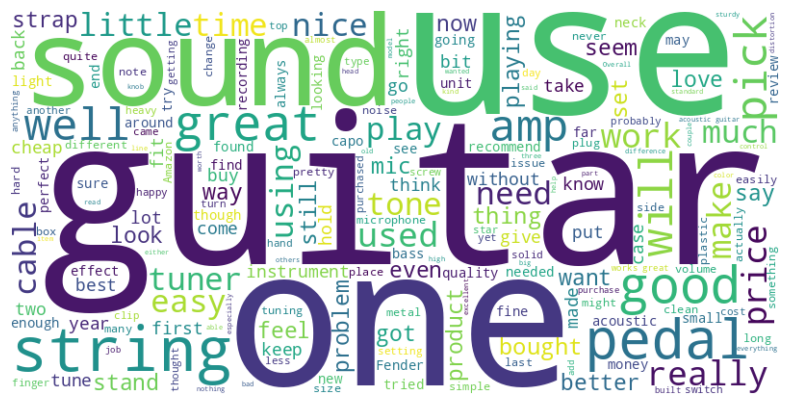

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Partiendo del DF y de la columna "reviewText" como la que tiene los caracteres de texto a analizar
text = ' '.join(df['reviewText'].astype(str).tolist())

# Creo una word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Muestro la word cloud usando la librería Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Elimino los ejes
plt.show()

### **Count Vectorizer**

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# Fiteamos el CountVectorizer a los datos de entrenamiento
vect = CountVectorizer().fit(X_train)

In [21]:
# transformamos los documentos del training set a una matriz de documentos-términos:

X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<7695x17858 sparse matrix of type '<class 'numpy.int64'>'
	with 443574 stored elements in Compressed Sparse Row format>

In [22]:
X_train_vectorized.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [23]:
from sklearn.linear_model import LogisticRegression

# Entrenamos el modelo
model = LogisticRegression(max_iter=2500)
model.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=2500)

In [24]:
from sklearn.metrics import accuracy_score
# Hacemos las predicciones sobre el set de testeo:
predictions = model.predict(vect.transform(X_test))

print('Accuracy', accuracy_score(y_test, predictions))

Accuracy 0.88269680436477


In [25]:
# Obtenemos los nombres de las features como un array de numpy
import numpy as np
feature_names = np.array(vect.get_feature_names_out())

# Ordenamos a los coeficientes del modelo
sorted_coef_index = model.coef_[0].argsort()

# Observamos a los 10 coeficientes más grandes y más chicos:
print('Coefs menores:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Coefs mayores: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Coefs menores:
['ok' 'returned' 'okay' 'useable' 'hoping' 'broke' 'luck' 'idea' 'overall'
 'unfortunately']

Coefs mayores: 
['perfectly' 'highly' 'beat' 'sturdy' 'excellent' 'perfect' 'pleased'
 'awesome' 'complaint' 'instruments']


### **N-gramas**

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

# Fiteamos el CountVectorizer a los datos de entrenamiento
vect = CountVectorizer(ngram_range=(1,2)).fit(X_train)


In [27]:
len(vect.get_feature_names_out())

233570

In [28]:
# transformamos los documentos del training set a una matriz de documentos-términos:

X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<7695x233570 sparse matrix of type '<class 'numpy.int64'>'
	with 1059784 stored elements in Compressed Sparse Row format>

### **Regresión logística**

In [60]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, auc, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.feature_extraction.text import CountVectorizer

In [54]:
# Inicializo el CountVectorizer con los parámetros deseados
bow_counts = CountVectorizer(ngram_range=(1, 2))

# Creo la matriz
X = bow_counts.fit_transform(df['reviewText'])

# Determino que la variable target es "Positivo"
y = df['Positivo']

# Segmento la información en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [55]:
# Entrenamos el modelo
modelreg = LogisticRegression(max_iter=2500)
modelreg.fit(X_train, y_train)

LogisticRegression(max_iter=2500)

In [56]:
#Instancio el CountVectorizer y determino que la variable objetivo es Sentiment
bow_counts = CountVectorizer()
X = bow_counts.fit_transform(df['reviewText'])
y = df['Positivo']

In [57]:
#Instancio las variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [58]:
#Realizo el fit del modelo
scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)

In [68]:
from sklearn.metrics import accuracy_score
modelreg = LogisticRegression(max_iter=2500)

#Fiteo el modelo y lo entreno
modelreg.fit(X_train, y_train)  # Train the 'model' using the training data

# Hago predicciones sobre el modelo
predictions = modelreg.predict(X_test)

#Detallo el accuracy obtenido
reglog_accuracy = accuracy_score(y_test, predictions)
print('Accuracy', reglog_accuracy)

Accuracy 0.8806624452021432


### **Random Forest**

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

#Segmento la información en entrenamiento y prueba
bow_counts = CountVectorizer()
X = bow_counts.fit_transform(df['reviewText'])
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Entrenamiento de modelo

rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)


#Muestro el accuracy del modelo
print('Accuracy Random Forest:', rf_accuracy)


Accuracy Random Forest: 0.8816366293229421


In [65]:
#Busco y determino los coeficientes mayores y menores en función de las reviews obtenidas
feature_names = np.array(vect.get_feature_names_out())
sorted_coef_index = model.coef_[0].argsort()
print('Coefs menores:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Coefs mayores: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Coefs menores:
['amp too' 'amplug ac30' '40 dollar' 'and needs' 'after tuned' 'as capos'
 'agree however' 'and neither' 'are truying' 'aj220sce']

Coefs mayores: 
['affordable find' 'acoustic now' 'anady' 'aged' '34 brand' 'analeratec'
 'after tried' 'arrangement so' 'amp online' '20 just']


###**Comparación de modelos**

In [71]:
print("Accuracy de Random Forest:", rf_accuracy)
print("Accuracy de Regresión Logística:", reglog_accuracy)

# Compara las accuracies
if rf_accuracy > reglog_accuracy:
    print("El modelo de Random Forest tiene una mayor accuracy")
elif reglog_accuracy > rf_accuracy:
    print("La regresión logística tiene una mayor accuracy")
else:
    print("Las dos modelos tienen la misma accuracy")

Accuracy de Random Forest: 0.8816366293229421
Accuracy de Regresión Logística: 0.8806624452021432
El modelo de Random Forest tiene una mayor accuracy


### **TF - IDF**

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [74]:
X = df['reviewText']  # Columna con los textos de revisión
y = df['overall']    # Variable objetivo (puntuación general)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [97]:
#TF IDF para el modelo de Regresión Logística
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(random_state=42)

In [98]:
#TF IDF para el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [99]:
from sklearn.metrics import accuracy_score, classification_report

# Regresión Logística
lr_predictions = lr_model.predict(X_test_tfidf)
print("Regresión Logística:")
print(f"Accuracy: {accuracy_score(y_test, lr_predictions):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_predictions))

# Random Forest
rf_predictions = rf_model.predict(X_test_tfidf)
print("\nRandom Forest:")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))

Regresión Logística:
Accuracy: 0.696

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        51
           2       0.00      0.00      0.00        53
           3       0.46      0.09      0.14       140
           4       0.40      0.19      0.26       411
           5       0.73      0.96      0.83      1398

    accuracy                           0.70      2053
   macro avg       0.32      0.25      0.25      2053
weighted avg       0.61      0.70      0.63      2053



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest:
Accuracy: 0.683

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.02      0.04        51
           2       0.00      0.00      0.00        53
           3       0.00      0.00      0.00       140
           4       0.57      0.01      0.02       411
           5       0.68      1.00      0.81      1398

    accuracy                           0.68      2053
   macro avg       0.45      0.21      0.17      2053
weighted avg       0.60      0.68      0.56      2053



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###**Conclusiones**

Como se puede observar, con la técnica TF IDF se obtuvieron Accuracy menores en ambos modelos de estudio, tando en Random Forest como en la Regresión Logística. Por lo cual, se debería realizar una limpieza aún mayor y aplicar un trabajo de redes neuronales para reducir la dimensionalidad del dataset.